In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split

In [2]:
def euclidean_distance(x,y):
    x , y = np.array(x), np.array(y)
    distance = np.sqrt(np.sum(np.square(x-y)))
    return distance

In [3]:
class KNN:
    def __init__(self, n_neighbors): 
        self.n_neighbors = n_neighbors

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def get_neighbors(self, x):
        distances = []
        for x_train in self.X_train:
            dist = euclidean_distance(x,x_train)
            distances.append(dist)
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = []
        for i in k_indices:
            k_nearest_labels.append(self.y_train[i])
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

    def predict(self,X):
        predictions = []
        for x in X:
            predictions.append(self.get_neighbors(x))
        return predictions
    
    def accuraccy(self, predictions, y_test):
        acc = np.sum(predictions == y_test) / len(y_test)
        return acc

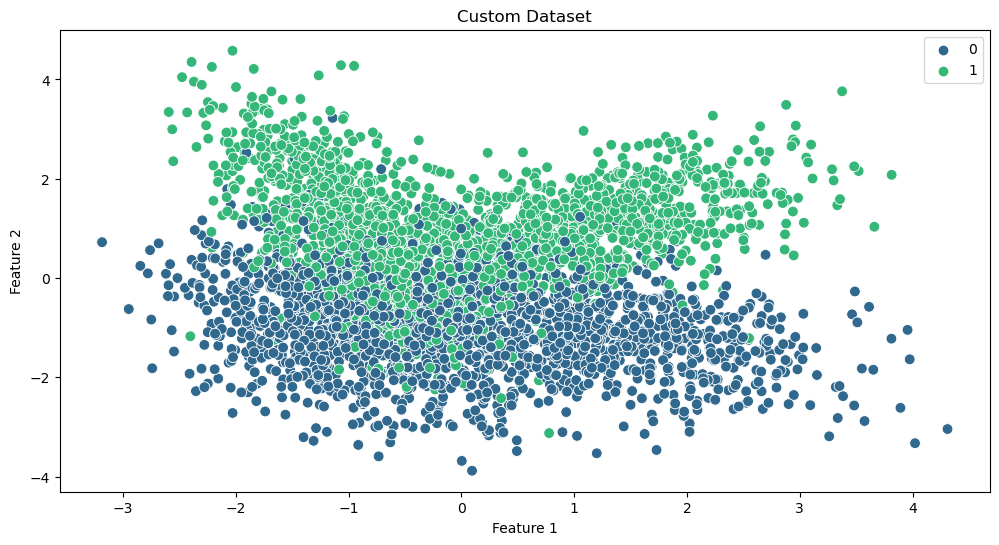

In [25]:
#X, y = make_blobs(n_samples = 3000, n_features= 2 ,centers = 3 , cluster_std = 1.5 ,random_state = 0)

X, y = make_classification(n_samples = 4000, n_features= 2  ,n_redundant = 0, random_state=10)

plt.figure(figsize = (12,6))
sns.scatterplot(x = X[ : , 0], y = X[ : , 1], hue=y, palette = "viridis", s=60)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Custom Dataset")
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7)

In [27]:
kmeans = KNN(3)
kmeans.fit(X_train,y_train)

In [28]:
y_pred = kmeans.predict(X_test)

In [29]:
kmeans.accuraccy(y_pred,y_test)

0.8166666666666667

The test point belong to the 1 class.


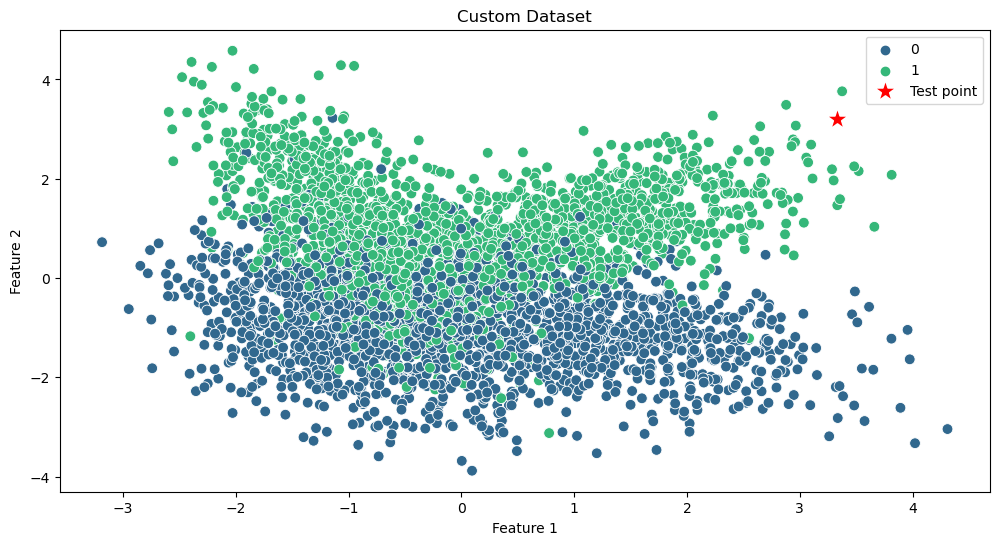

In [36]:
Test_point = np.random.uniform(low=-4, high=4, size=(2,))
Test_point = Test_point.reshape(1,2)
Test_prediction = kmeans.predict(Test_point)
print("The test point belong to the", Test_prediction[0], "class.")

plt.figure(figsize = (12,6))
sns.scatterplot(x = X[ : , 0], y = X[ : , 1], hue=y, palette = "viridis", s=60)
sns.scatterplot(x = Test_point[ : , 0], y = Test_point[ : , 1], color='red', marker= '*', s=300 , label = "Test point")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Custom Dataset")
plt.show()